# Machine Learning Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import os

## Load Datasets

In [2]:
#dir_name = 'data_files/'

X_train = pd.read_csv('final_X_train.csv')
X_test = pd.read_csv('final_X_test.csv')
y_train = pd.read_csv('final_y_train.csv')
y_test = pd.read_csv('final_y_test.csv')

In [3]:
X_train.columns

Index(['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'lng', 'lat', 'is_weekend',
       'room_type_Private room', 'room_type_Shared room', 'city_Athens',
       'city_Barcelona', 'city_Berlin', 'city_Budapest', 'city_Lisbon',
       'city_London', 'city_Paris', 'city_Rome', 'city_Vienna'],
      dtype='object')

## Feature Selection

- Drop: `guest_satisfaction_overall`, `cleanliness_rating`, `attr_index`, `rest_index`

- `room_shared`, `room_private`, `person_capacity`, `host_is_superhost`, `multi`, `biz`, `bedrooms`, `dist`, `metro_dist`, `attr_index_norm`, `lng`, `lat` `is_weekend`, `room_type_Private room` `room_type_Shared room`, `city_Athens`, `city_Barcelona`, `city_Berlin`, `city_Budapest` `city_Lisbon`, `city_London`, `city_Paris`, `city_Rome`, `city_Vienna`

In [4]:
drop_ft = ['attr_index', 'rest_index', 'guest_satisfaction_overall', 'cleanliness_rating']
#features = ['bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat', 'person_capacity', 'cleanliness_rating']
#features = ['room_private', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat', 'is_weekend', 'city_Athens', 'city_Barcelona', 'city_Berlin', 'city_Budapest', 'city_Lisbon', 'city_London', 'city_Paris', 'city_Rome', 'city_Vienna']
#features = ['room_private', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat', 'is_weekend']
X_train = X_train.drop(columns=drop_ft)
X_test = X_test.drop(columns=drop_ft)

In [5]:
X_train.columns

Index(['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
       'multi', 'biz', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm',
       'rest_index_norm', 'lng', 'lat', 'is_weekend', 'room_type_Private room',
       'room_type_Shared room', 'city_Athens', 'city_Barcelona', 'city_Berlin',
       'city_Budapest', 'city_Lisbon', 'city_London', 'city_Paris',
       'city_Rome', 'city_Vienna'],
      dtype='object')

## Models Experiment

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Plot y_predict x y_actual

def plot_predict_actual(y_actual, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_pred)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

### Machine Learning Models

In [8]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [9]:
evaluation_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    evaluation_metrics[name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R2': train_r2,
        'Test R2': test_r2
    }

    print(f"📊 {name}")
    print(f"  🟢 Train - MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
    print(f"  🔵 Test  - MAE: {test_mae:.4f}, R2: {test_r2:.4f}\n")

📊 LinearRegression
  🟢 Train - MAE: 82661.6670, R2: 0.2220
  🔵 Test  - MAE: 87487.4937, R2: 0.2241

📊 Ridge
  🟢 Train - MAE: 82859.2873, R2: 0.2201
  🔵 Test  - MAE: 87607.8761, R2: 0.2230

📊 Lasso
  🟢 Train - MAE: 83893.7467, R2: 0.2104
  🔵 Test  - MAE: 88871.0413, R2: 0.2118



c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


📊 RandomForest
  🟢 Train - MAE: 7835.3872, R2: 0.9263
  🔵 Test  - MAE: 37705.0159, R2: 0.6656



c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


📊 GradientBoosting
  🟢 Train - MAE: 58099.9753, R2: 0.4532
  🔵 Test  - MAE: 78679.9508, R2: 0.3022



In [11]:
importances = models['RandomForest'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
12,lat,0.183891
9,attr_index_norm,0.177970
11,lng,0.140593
6,bedrooms,0.101215
7,dist,0.100145
10,rest_index_norm,0.090660
8,metro_dist,0.075767
2,person_capacity,0.040809
14,room_type_Private room,0.018380
1,room_private,0.017701


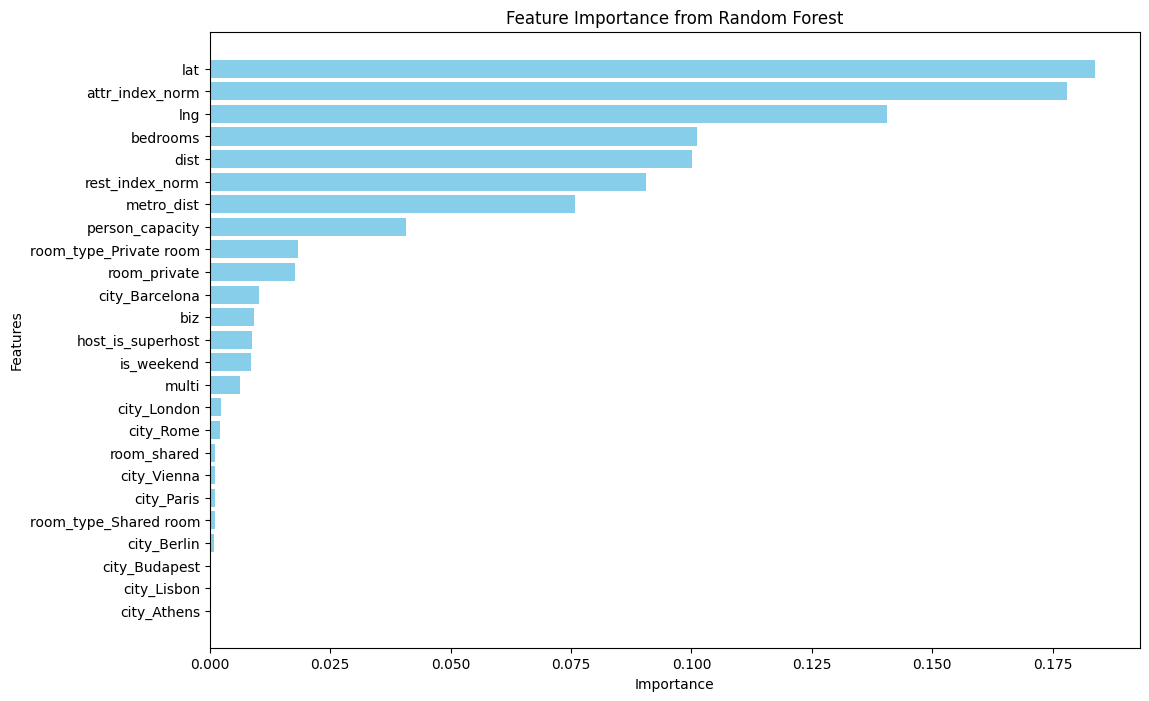

In [12]:
plt.figure(figsize=(12, 8))
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

In [10]:
os.makedirs('models', exist_ok=True)

joblib.dump(models["RandomForest"], 'models/RF.pkl')
print("Model saved successfully in 'models/RF.pkl'")

Model saved successfully in 'models/RF.pkl'


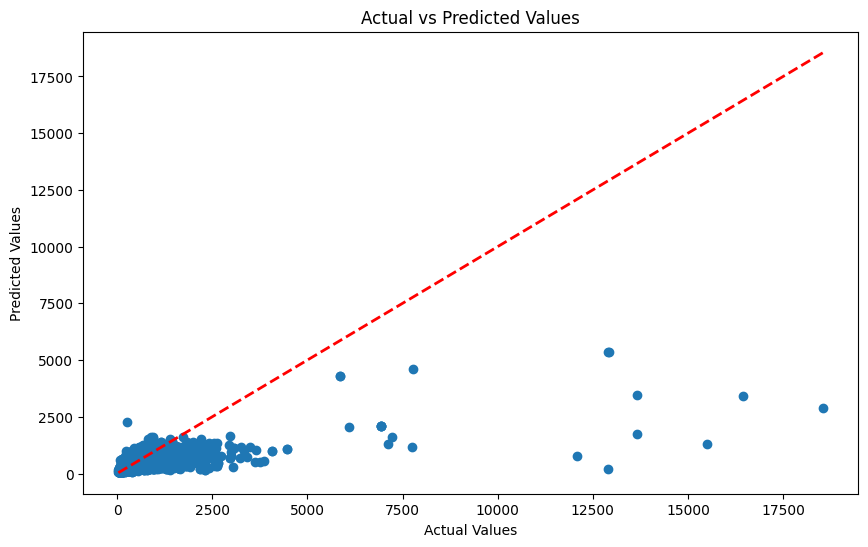

In [12]:
plot_predict_actual(y_actual=y_train, y_pred=y_train_pred)

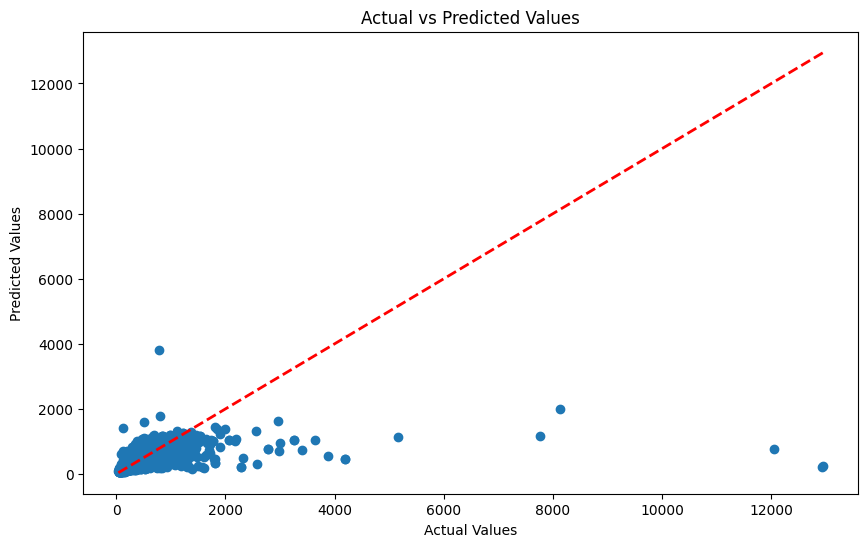

In [25]:
plot_predict_actual(y_actual=y_test, y_pred=y_test_pred)

### Random Forest

In [17]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [False]
}

rf = RandomForestRegressor(random_state=42)

random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train.squeeze())

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Evaluation

In [18]:
y_train_predict = random_search.best_estimator_.predict(X_train)
y_test_predict = random_search.best_estimator_.predict(X_test)

In [19]:
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("🟢 Train - MSE: ", mse_train)
print("🔵 Test - MSE: ", mse_test)
print("🟢 Train - R2: ", r2_train)
print("🔵 Test - R2: ", r2_test)

🟢 Train - MSE:  0.567871283360462
🔵 Test - MSE:  31813.074637103546
🟢 Train - R2:  0.9999946550793409
🔵 Test - R2:  0.717864899828761


Feature Importance

In [20]:
importances = random_search.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
12,lat,0.171896
11,lng,0.146538
9,attr_index_norm,0.141432
10,rest_index_norm,0.111051
7,dist,0.106611
8,metro_dist,0.091881
6,bedrooms,0.060030
2,person_capacity,0.051387
14,room_type_Private room,0.018598
1,room_private,0.017474


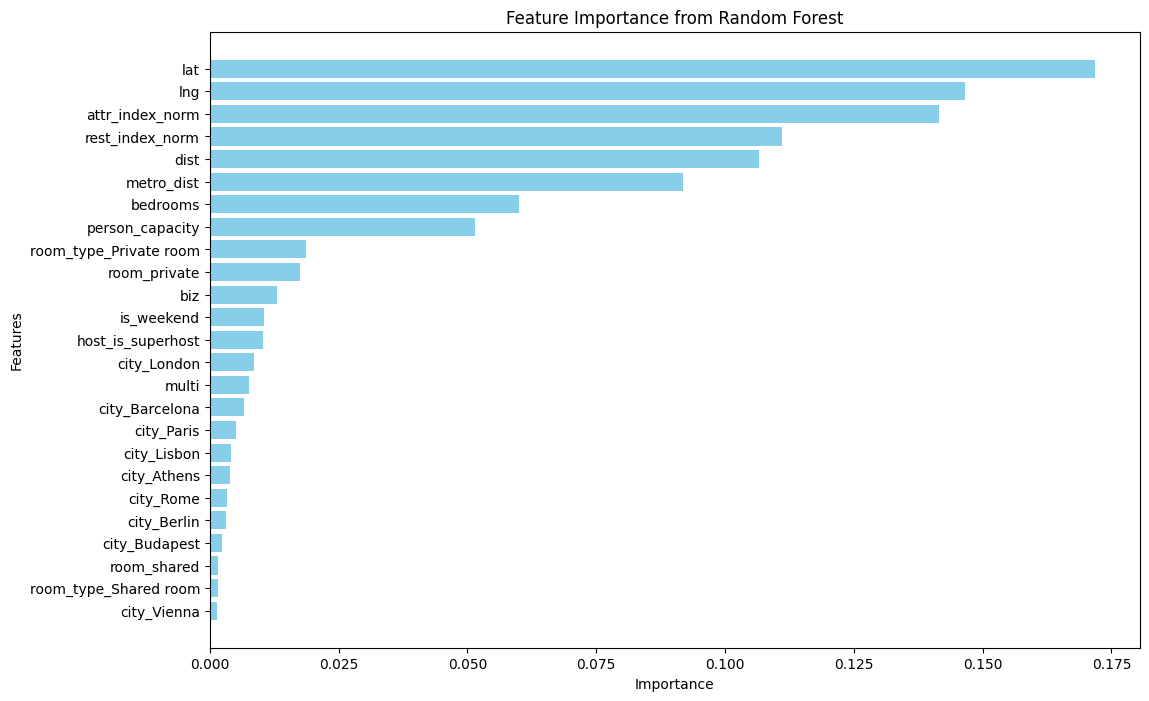

In [21]:
plt.figure(figsize=(12, 8))
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

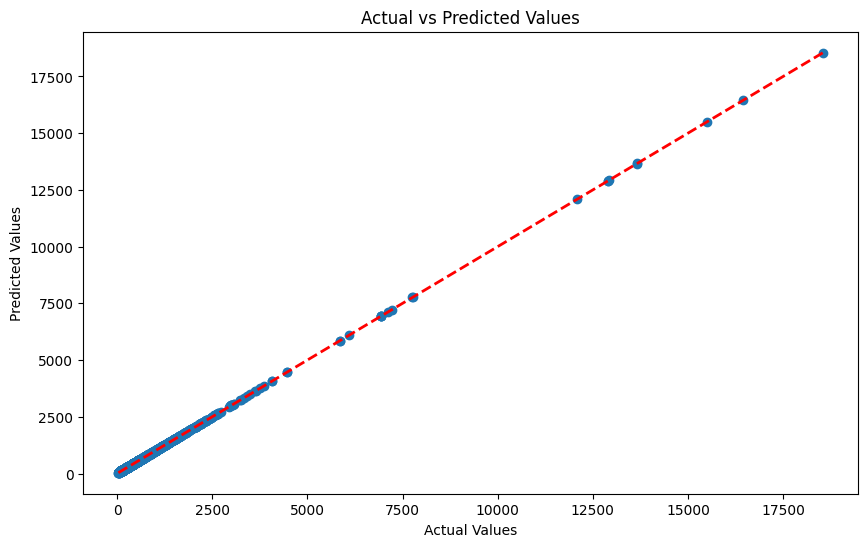

In [22]:
plot_predict_actual(y_actual=y_train, y_pred=y_train_predict)

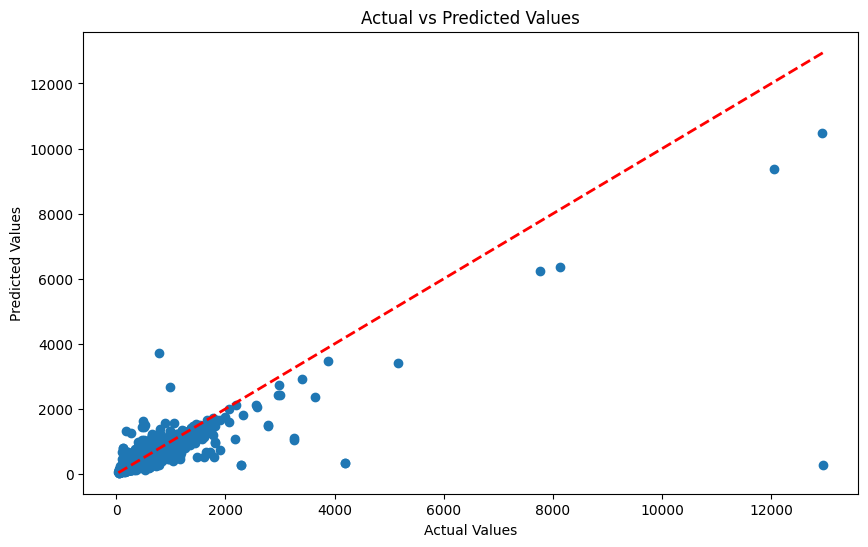

In [23]:
plot_predict_actual(y_actual=y_test, y_pred=y_test_predict)

Save the model

In [24]:
os.makedirs('models', exist_ok=True)

joblib.dump(random_search.best_estimator_, 'models/RF_tuning_best_model.pkl')
print("Model saved successfully in 'models/RF_tuning_best_model.pkl'")

#joblib.dump(random_search.best_estimator_, 'models/random_search_best_model_1.pkl')
# Load the model later
#best_model = joblib.load('models/random_search_best_model.pkl')

Model saved successfully in 'models/RF_tuning_best_model.pkl'


### Stacking

In [42]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=None)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)),
    ('ridge', Ridge(alpha=1.0))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_model.fit(X_train, y_train)


c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=200)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=200)),
                              ('ridge', Ridge())],
                  final_estimator=Ridge())

In [43]:
y_train_sm = stacking_model.predict(X_train)
y_test_sm = stacking_model.predict(X_test)

sm_mae = mean_squared_error(y_train, y_train_sm)
sm_r2 = r2_score(y_test, y_test_sm)

print('MAE: ', sm_mae)
print('R2: ', sm_r2)

MAE:  19050.87278520156
R2:  0.33135420807314997
